## Load Dataset

Set Strava-DataVis imports

In [1]:
from calcs import convert
from formats import formats
from calcs import interpolate as calcintrp

Set Python imports

In [2]:
from scipy import interpolate

Load excel file outputted from 1_Parse_fit_Files example set

In [3]:
# load dateset from folder
parsed_dir = "datasets/Seattle_Dataset" 
strava_data = formats.read_xlsx(parsed_dir)
len(strava_data['activities'])

147

Check for corrupt data

In [4]:
corrupted_files = []
for a_key in strava_data['activities'].keys():
    t_stmp = strava_data['activities'][a_key]['timestamp']
    if t_stmp.size == 0:
        corrupted_files.append(a_key)
corrupted_files

[]

## Interpolate Data

It is not guaranteed that each recorded activity will record data at the same rate. For example, lets plot the 'timestamp' column for a few activities and create a new column for elapsed time.

In [5]:
import matplotlib.pyplot as plt

In [6]:
# Calculate elapsed time
# elapsed time = timestamp[i] - timestamp[0]
for a_key in strava_data['activities'].keys():
    t_stmp = strava_data['activities'][a_key]['timestamp']
    strava_data['activities'][a_key]['elpsd_time'] = t_stmp - t_stmp[0]

In [7]:
plot_set = list(strava_data['activities'].keys())[21:27]

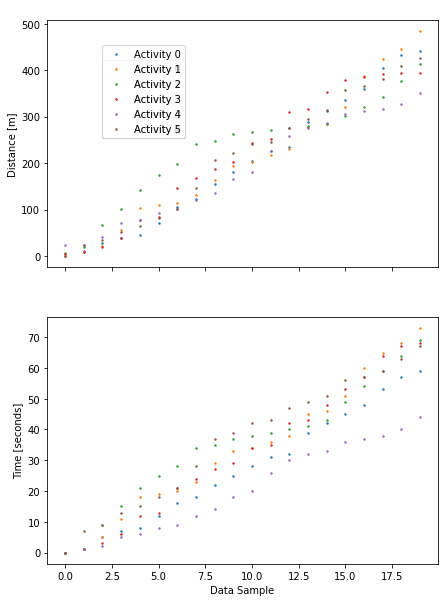

In [8]:
fig, axis = plt.subplots(2,1,sharex=True,figsize=(7,10))

for act_id, plot_act in enumerate(plot_set):
    act = strava_data["activities"][plot_act]
    time_len = len(strava_data['activities'][plot_act]['elpsd_time'][:20])
    
    axis[0].scatter(range(0,time_len),strava_data['activities'][plot_act]['distance'][:20],
                    s=2,label="Activity {}".format(act_id))
    axis[0].set_ylabel("Distance [m]")
    
    axis[1].scatter(range(0,time_len),strava_data['activities'][plot_act]['elpsd_time'][:20],
                    s=2)
    axis[1].set_ylabel("Time [seconds]")
    axis[1].set_xlabel("Data Sample")
    
    fig.legend(loc=(0.23,0.77))
    

If the data collection rate was constant, we would expect a straight line for Data Sample vs. Time. Notice how **Activity 1** collects 20 data samples over ~70 seconds while other activities collect at smaller rates! For this reason, we must interpolate the activity before we begin to compare the data as a function of time. See the [interpolation methods](https://thatguyeddieo.github.io/Strava-DataVis/calcs.html#module-calcs.interpolate) in the docs for more information.

In [15]:
# interpolate data
calcintrp.intrp1d(strava_data,'lat_intrp',['elpsd_time','position_lat'],step_size=1)
calcintrp.intrp1d(strava_data,'long_intrp',['elpsd_time','position_long'],step_size=1)
calcintrp.intrp1d(strava_data,'speed_intrp',['elpsd_time','enhanced_speed'], step_size=1)
calcintrp.intrp1d(strava_data,'distance_intrp',['elpsd_time','distance'], step_size=1)
calcintrp.intrp1d(strava_data,'elpsd_time_intrp',['elpsd_time','elpsd_time'], step_size=1)

Update units' meta data with new parameters created

In [10]:
unit_info = {'lat_intrp': 'semicircles',   'long_intrp': 'semicircles',
             'speed_intrp': 'm/s',         'elpsd_time': 'seconds',
             'distance_intrp': 'm',        'elpsd_time_intrp':'seconds'}
strava_data['units'].update(unit_info)

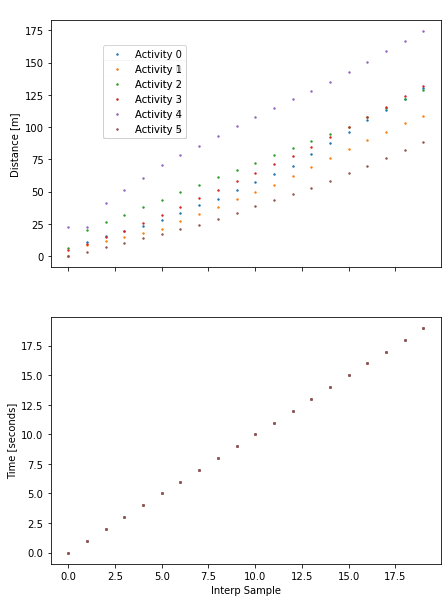

In [11]:
fig, axis = plt.subplots(2,1,sharex=True,figsize=(7,10))

for act_id, plot_act in enumerate(plot_set):
    act = strava_data["activities"][plot_act]
    time_len = len(strava_data['activities'][plot_act]['elpsd_time_intrp'][:20])
    
    axis[0].scatter(range(0,time_len),strava_data['activities'][plot_act]['distance_intrp'][:20],
                    s=2,label="Activity {}".format(act_id))
    axis[0].set_ylabel("Distance [m]")
    
    axis[1].scatter(range(0,time_len),strava_data['activities'][plot_act]['elpsd_time_intrp'][:20],
                    s=2)
    axis[1].set_ylabel("Time [seconds]")
    axis[1].set_xlabel("Interp Sample")
    
    fig.legend(loc=(0.23,0.77))

Now each activity lines up with time. For this example, notice how the 20 interpolated samples are linearly related to time and the distance graph shows uniformity across its new sample rate.

## Save Interpolated Data

In [12]:
new_dir = "datasets/Interpolated_Seattle_Dataset"
formats.write_xlsx(strava_data,new_dir)
print('Done')

Writing to /datasets/Interpolated_Seattle_Dataset/activities.xlsx
	Writing activity 3342746054
	Writing activity 3381305871
	Writing activity 3385302851
	Writing activity 3388256403
	Writing activity 3397678888
	Writing activity 3410342152
	Writing activity 3417012319
	Writing activity 3420132646
	Writing activity 3423242116
	Writing activity 3430723356
	Writing activity 3441153174
	Writing activity 3456862746
	Writing activity 3480735937
	Writing activity 3485732942
	Writing activity 3490211937
	Writing activity 3495267665
	Writing activity 3499648535
	Writing activity 3508784683
	Writing activity 3518644149
	Writing activity 3527816940
	Writing activity 3537904807
	Writing activity 3542379714
	Writing activity 3557969094
	Writing activity 3589532643
	Writing activity 3594941050
	Writing activity 3626718043
	Writing activity 3638095333
	Writing activity 3655153766
	Writing activity 3661269383
	Writing activity 3682625954
	Writing activity 3705655591
	Writing activity 3738995307
	Writi

Save runtime by saving interpolated dataset as a pickle file

In [13]:
import os
import pickle

In [14]:
pickle_file = os.path.join(new_dir,'strava_data.pickle')
with open(pickle_file, 'wb') as handle:
    pickle.dump(strava_data, handle, protocol=pickle.HIGHEST_PROTOCOL)